In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np

import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8")

# Q1

In [2]:
x = torch.tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])

In [3]:
y = torch.tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

In [4]:
b = torch.tensor(1.0, requires_grad = True)
w = torch.tensor(1.0, requires_grad = True)

In [5]:
learning_rate = torch.tensor(0.001)

In [6]:
loss_list = []

In [7]:
for epochs in range(100):

    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += (y_p - y[j])**2
        
    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward()
    with torch.no_grad():

        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

    w.grad.zero_()
    b.grad.zero_()

print(f"The parameters are w = {w}, b = {b}, loss = {loss.item()} ")

The parameters are w = 0.8200302720069885, b = 0.9878906011581421, loss = 0.01730593852698803 


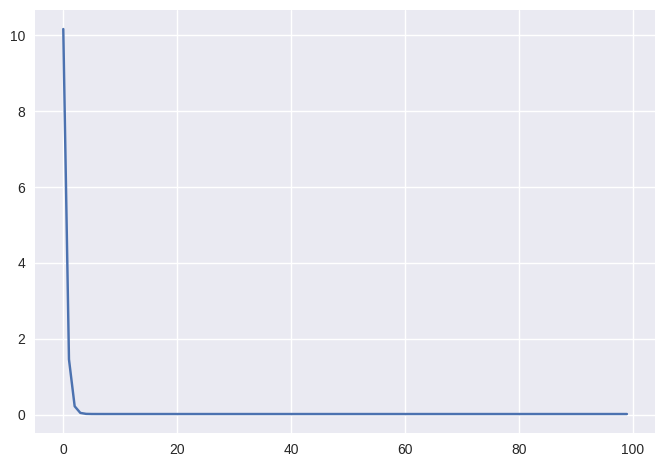

In [8]:
plt.plot(loss_list)
plt.show()

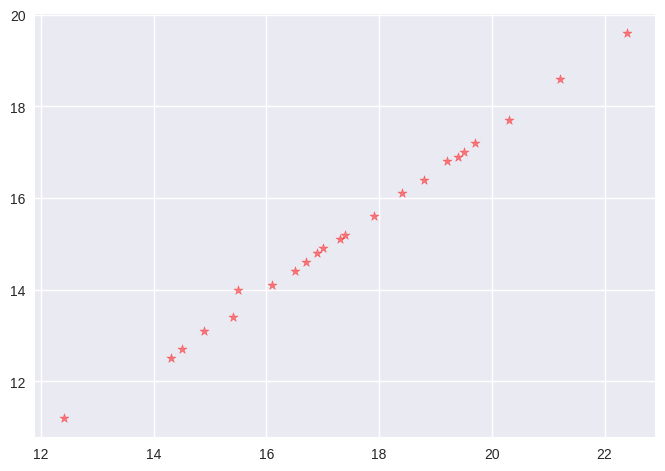

In [9]:
plt.scatter(x,y, color = 'red', alpha = 0.5, marker = '*')
plt.show()

# Q2

In [10]:
x = torch.tensor([2.0, 4.0])
y = torch.tensor([20.0, 40.0])

In [11]:
w = torch.tensor(1.0, requires_grad = True)
b = torch.tensor(1.0, requires_grad = True)

learning_rate = torch.tensor(0.001)
loss_list = []

In [12]:
for epochs in range(2):

    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += (y_p - y[j])**2
        
    loss = loss / len(x)
    loss_list.append(loss.item())
    loss.backward()
    
    with torch.no_grad():

        w -= learning_rate * w.grad
        b -= learning_rate * b.grad

        # w -= learning_rate * 1/2((w * x[0] - y[0])**2 + (w * x[1] - y[1])**2)
        # b -= learning_rate * (w* x[0]+b - y[0] + w * x[1] +b -y[1])

    
    print(f"The parameters are wgrad = {w.grad}, bgrad = {b.grad}, loss = {loss.item()} ")
    w.grad.zero_()
    b.grad.zero_()



The parameters are wgrad = -174.0, bgrad = -52.0, loss = 757.0 
The parameters are wgrad = -170.20799255371094, bgrad = -50.85199737548828, loss = 724.3797607421875 


In [13]:
w = 1.0
b = 1.0
loss_list = []

for epochs in range(2):

    loss = 0.0
    for j in range(len(x)):
        a = w * x[j]
        y_p = a + b
        loss += (y_p - y[j])**2
        
    loss = loss / len(x)
    
    
    dldw = (w * x[0]**2 + b*x[0] - x[0]*y[0] + w*x[1]**2 + b * x[1] - x[1]*y[1])
    dldb = (w* x[0]+b - y[0] + w * x[1] +b -y[1])

    w -= learning_rate * dldw
    b -= learning_rate * dldb
    
    
    print(f"The parameters are wgrad = {dldw}, bgrad = {dldb}, loss = {loss.item()} ")

The parameters are wgrad = -174.0, bgrad = -52.0, loss = 757.0 
The parameters are wgrad = -170.2080078125, bgrad = -50.85200119018555, loss = 724.3797607421875 


# Q3

In [14]:
class RegressionModel:

    def __init__ (self):
        self.w = torch.tensor(1.0, requires_grad = True)
        self.b = torch.tensor(1.0, requires_grad = True)
        
    def forward(self, x):
        return self.w * x + self.b

    def update(self):
        self.w-= learning_rate * self.w.grad
        self.b-= learning_rate * self.b.grad

    def reset_grad(self):
        self.w.grad.zero_()
        self.b.grad.zero_()

def criterion(yj, y_p):
     return (yj - y_p) ** 2

In [15]:
X = torch.tensor([5.0, 7.0, 12.0, 16.0, 20.0])
y = torch.tensor([40.0, 120.0, 180.0, 210.0, 240.0])
learning_rate = torch.tensor(0.001)

In [16]:
model = RegressionModel()

loss_list = []

for epochs in range(100):
    loss = 0.0
    for j in range(len(x)):
        y_p = model.forward(x[j])
        
        loss += criterion(y[j], y_p)

    loss = loss/len(x)
    loss_list.append(loss.item())

    loss.backward()

    with torch.no_grad():
        model.update()
    model.reset_grad()


    print(f"w = {model.w}, b = {model.b} loss = {loss.item()}")

w = 1.534000039100647, b = 1.1519999504089355 loss = 7297.0
w = 2.056407928466797, b = 1.3004919290542603 loss = 6992.10107421875
w = 2.567476749420166, b = 1.4455524682998657 loss = 6700.3583984375
w = 3.0674538612365723, b = 1.5872565507888794 loss = 6421.20166015625
w = 3.5565812587738037, b = 1.725677251815796 loss = 6154.08984375
w = 4.035095691680908, b = 1.8608864545822144 loss = 5898.50146484375
w = 4.503228664398193, b = 1.992954134941101 loss = 5653.9404296875
w = 4.961206436157227, b = 2.1219489574432373 loss = 5419.93017578125
w = 5.409250736236572, b = 2.2479379177093506 loss = 5196.015625
w = 5.847578048706055, b = 2.3709864616394043 loss = 4981.7607421875
w = 6.276400566101074, b = 2.491158962249756 loss = 4776.7490234375
w = 6.695925712585449, b = 2.608518123626709 loss = 4580.5810546875
w = 7.106356143951416, b = 2.723125457763672 loss = 4392.8759765625
w = 7.507890224456787, b = 2.835041046142578 loss = 4213.267578125
w = 7.900722026824951, b = 2.9443235397338867 loss

[]

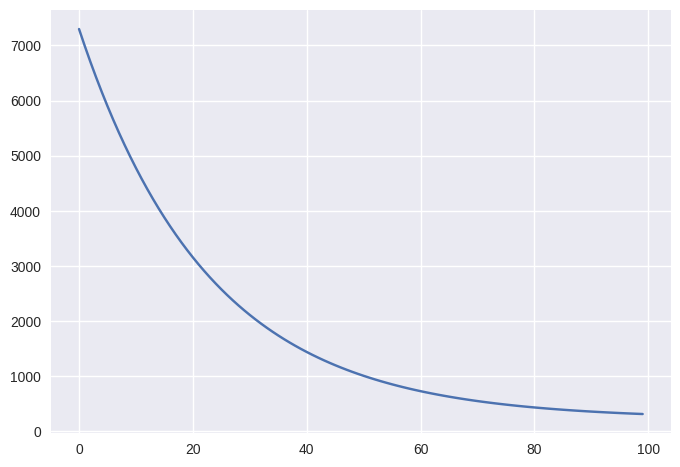

In [17]:
plt.plot(loss_list)
plt.plot()

# Q4

In [18]:
X = torch.Tensor([12.4, 14.3, 14.5, 14.9, 16.1, 16.9, 16.5, 15.4, 17.0, 17.9, 18.8, 20.3, 22.4, 19.4, 15.5, 16.7, 17.3, 18.4, 19.2, 17.4, 19.5, 19.7, 21.2])
y = torch.Tensor([11.2, 12.5, 12.7, 13.1, 14.1, 14.8, 14.4, 13.4, 14.9, 15.6, 16.4, 17.7, 19.6, 16.9, 14.0, 14.6, 15.1, 16.1, 16.8, 15.2, 17.0, 17.2, 18.6])

In [19]:
class LinearRegression(nn.Module):

    def __init__(self, learning_rate=0.001):
        super(LinearRegression, self).__init__()

        self.w = torch.randn([1]).requires_grad_(True)
        self.b = torch.randn([1]).requires_grad_(True)
        
        self.optimizer = torch.optim.SGD([self.w, self.b], lr=learning_rate)
        self.criterion = nn.MSELoss()


    def forward(self, X):
        return self.w * X + self.b

    def fit(self, X, y, num_epochs=1000):

        losses = []
        
        for epoch in range(num_epochs):
            
            self.optimizer.zero_grad()
            preds = self(X)
            
            loss = self.criterion(preds, y)
            loss.backward()
            losses.append(loss.item())
            
            self.optimizer.step()

        print(f"Final params are: w={self.w}, b={self.b}, loss={losses[-1]}")
        
        final_preds = (self.w * X + self.b).detach().numpy()
        plt.plot(X, y, "bo", alpha=0.5)
        plt.plot(X, final_preds, "g-")
        plt.show()

Final params are: w=tensor([0.9630], requires_grad=True), b=tensor([-1.5538], requires_grad=True), loss=0.08276534080505371


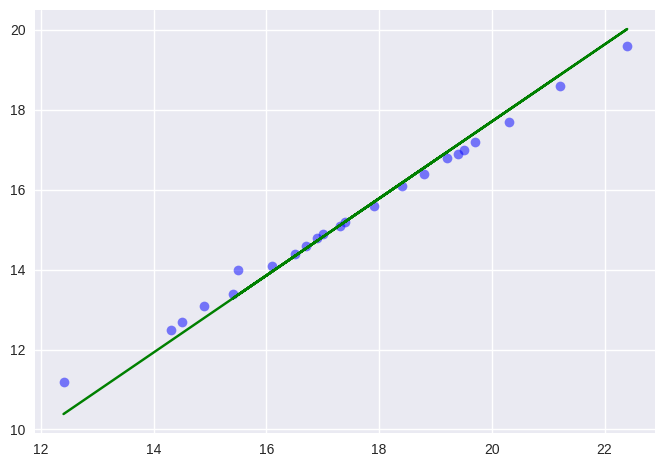

In [20]:
m = LinearRegression()
m.fit(X, y)

# Q5

In [21]:
class TrueLinearRegression(nn.Module):

    def __init__(self, input_dims, learning_rate=0.001):

        super(TrueLinearRegression, self).__init__()
        self.linear = nn.Linear(input_dims, 1)

        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.criterion = nn.MSELoss()

    def forward(self, X):
        return self.linear(X)

    def fit(self, X, y, num_epochs=100, plot=True):

        losses = []
        
        for epoch in range(num_epochs):
            
            self.optimizer.zero_grad()
            preds = self(X)
            
            loss = self.criterion(preds, y)
            loss.backward()
            losses.append(loss.item())
            
            self.optimizer.step()

        for name, param in self.named_parameters():
            print(f'{name} = {param.data}')

        if plot:
            final_preds = self(X).detach().numpy()
            plt.plot(X, y, "bo", alpha=0.5)
            plt.plot(X, final_preds, "g-")
            plt.show()

linear.weight = tensor([[0.8363]])
linear.bias = tensor([0.6979])


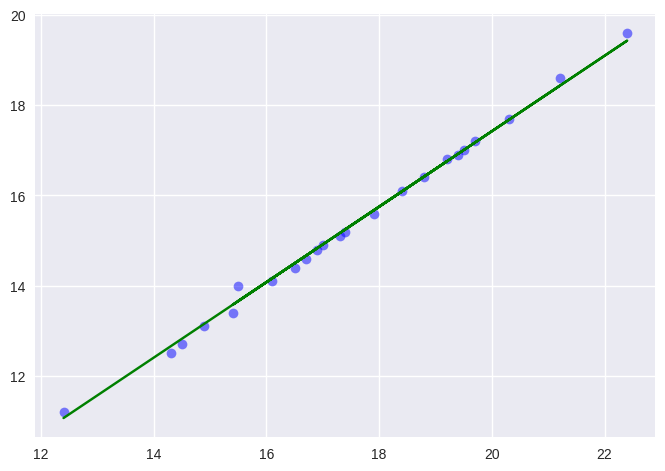

In [22]:
m = TrueLinearRegression(input_dims=1)
m.fit(X.reshape(-1, 1), y.reshape(-1, 1))

# Q6

In [23]:
X = torch.Tensor([[3, 8], [4, 5], [5, 7], [6, 3], [2, 1]])
y = torch.Tensor([-3.7, 3.5, 2.5, 11.5, 5.7]).reshape(-1, 1)

In [24]:
m = TrueLinearRegression(input_dims=2)
m.fit(X, y, plot=False)

linear.weight = tensor([[ 1.3859, -0.4764]])
linear.bias = tensor([-0.1719])


# Q7

In [25]:
class LogisticRegression(nn.Module):

    def __init__(self, input_dims=1, learning_rate=0.005):

        super(LogisticRegression, self).__init__()
        self.linear = nn.Linear(input_dims, 1)
        self.sigmoid = nn.Sigmoid()

        self.optimizer = torch.optim.SGD(self.parameters(), lr=learning_rate)
        self.criterion = nn.BCELoss()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

    def fit(self, X, y, num_epochs=5000, plot=True):

        losses = []
        
        for epoch in range(num_epochs):
            
            self.optimizer.zero_grad()
            preds = self(X)
            
            loss = self.criterion(preds, y)
            loss.backward()
            losses.append(loss.item())
            
            self.optimizer.step()

        for name, param in self.named_parameters():
            print(f'{name} = {param.data}')

        if plot:
            plt.plot(range(num_epochs), losses, "g-")
            plt.show()

linear.weight = tensor([[0.0943]])
linear.bias = tensor([-3.0240])


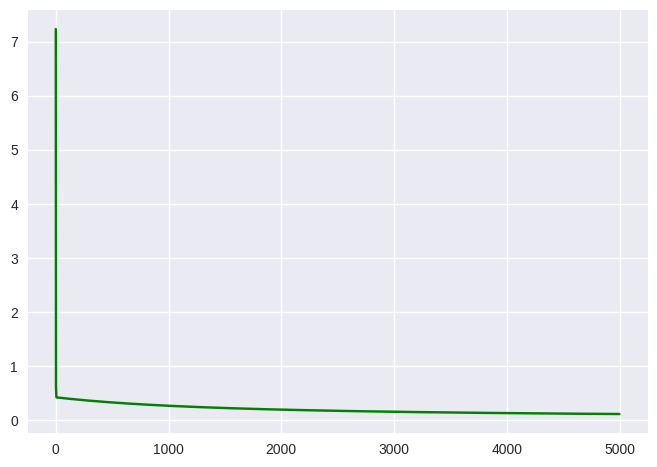

In [26]:
X = torch.Tensor([1, 5, 10, 10, 25, 50, 70, 75, 100]).reshape(-1, 1)
y = torch.Tensor([0, 0, 0, 0, 0, 1, 1, 1, 1]).reshape(-1, 1)

m = LogisticRegression()
m.fit(X, y)